### Network Construction with NetworkX

C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]

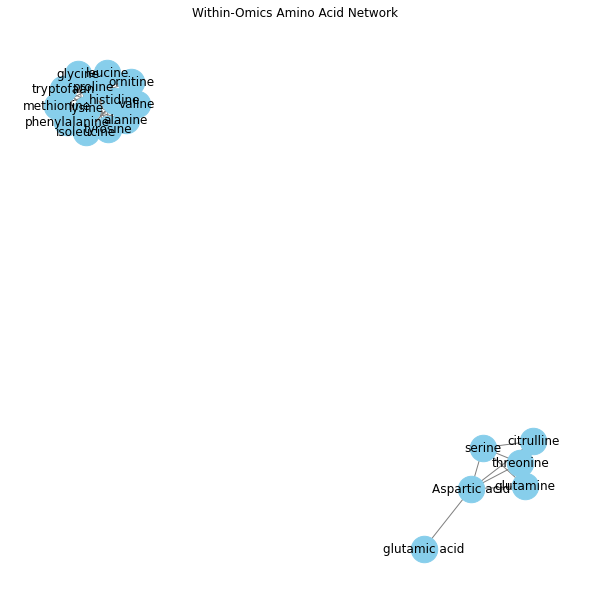

In [1]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess the dataset (as previously done)
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
df_amino = df.iloc[:, 1:22]  # Selecting amino acids columns
df_prot = df.iloc[:, 22:]    # Selecting protein columns

# Create within-omics networks
G_amino = nx.Graph()
for i in df_amino.columns:
    for j in df_amino.columns:
        if i != j:
            # Add edge if correlation is high
            if abs(df_amino[i].corr(df_amino[j])) > 0.7:
                G_amino.add_edge(i, j, weight=df_amino[i].corr(df_amino[j]))

G_prot = nx.Graph()
for i in df_prot.columns:
    for j in df_prot.columns:
        if i != j:
            # Add edge if correlation is high
            if abs(df_prot[i].corr(df_prot[j])) > 0.7:
                G_prot.add_edge(i, j, weight=df_prot[i].corr(df_prot[j]))

# Visualize one of the networks
plt.figure(figsize=(8, 8))
nx.draw(G_amino, with_labels=True, node_color="skyblue", node_size=700, edge_color="gray")
plt.title("Within-Omics Amino Acid Network")
plt.show()
